In [1]:
"""
NOTE: to view the tags, you can uncomment all print statements
"""

'\nTO-DO:\n[x] - Intersection of all methods\n    [x] - t-Sne + TF-IDF + YAKE! + CrowdTruth\n[x] - Intersection of 3 methods\n    [x] - t-Sne + TF-IDF + YAKE!\n    [x] - t-Sne + TF-IDF + CrowdTruth\n    [x] - t-Sne + YAKE! + CrowdTruth\n    [x] - TF-IDF + YAKE! + CrowdTruth\n[X] - Intersection of 2 methods\n    [x] - t-Sne + TF-IDF\n    [x] - t-Sne + YAKE!\n    [x] - t-Sne + CrowdTruth\n    \n    [x] - TF-IDF + YAKE!\n    [x] - TF-IDF + CrowdTruth\n    \n    [x] - YAKE! + CrowdTruth\n    \n[x] - tags unique to only one method.\n    [x] - t-Sne\n    [x] - TF-IDF\n    [x] - YAKE!\n    [x] - CrowdTruth\n    \n[x] - create Venn Diagram for all methods\n'

In [2]:
import csv

#!pip install venn
from venn import venn
%matplotlib inline

In [3]:
def get_set_from_csv(file_path):
    tag_set = set()
    with open(file_path, encoding="utf8") as csv_file:
        csv_reader = csv.reader(csv_file)
        for tag in csv_reader:
            tag_set.add(tag[0])
        
    #print(tag_set)    
    return tag_set

In [4]:
def write_csv(tags, outfile_path):    
    with open(outfile_path, 'w', encoding="utf8") as file:
        for tag in tags:
            file.write(tag)
            file.write('\n')

In [5]:
crowdtruth = get_set_from_csv('crowdtruth.csv')
tfidf = get_set_from_csv('TF-IDF.csv')
yake = get_set_from_csv('YAKE.csv')
tsne = get_set_from_csv('t-sne.csv')      

print('Number of candidate tags from CrowdTruth: ' + str(len(crowdtruth)))
print('Number of candidate tags from TF-IDF: ' + str(len(tfidf)))
print('Number of candidate tags from YAKE!: ' + str(len(yake)))
print('Number of candidate tags from t-SNE: ' + str(len(tsne)))

Number of candidate tags from CrowdTruth: 493
Number of candidate tags from TF-IDF: 586
Number of candidate tags from YAKE!: 477
Number of candidate tags from t-SNE: 459


# Venn Diagram

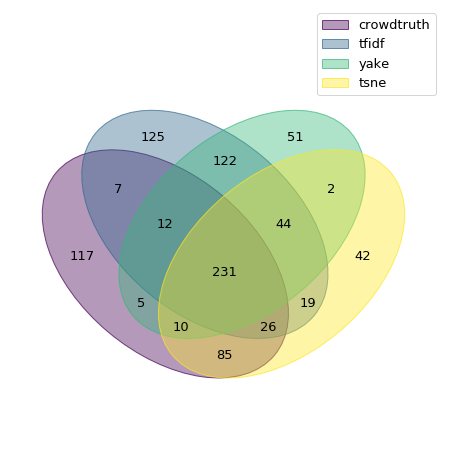

In [6]:
methods = {}
methods['crowdtruth'] = crowdtruth
methods['tfidf'] = tfidf
methods['yake'] = yake
methods['tsne'] = tsne

venn(methods)


# Intersection of all methods

In [7]:
intersection_all = crowdtruth.intersection(tfidf, yake, tsne)
print('Number of tags: ' + str(len(intersection_all)))
print(intersection_all)

write_csv(intersection_all, 'all_methods_intersection')

Number of tags: 231
{'tool', 'link', 'memory', 'paste', 'line', 'app', 'cookie', 'order', 'profile', 'cpu', 'code', 'black', 'word', 'account', 'support', 'set', 'button', 'player', 'card', 'restore', 'function', 'date', 'hard', 'content', 'dialog', 'slow', 'correctly', 'sidebar', 'run', 'reader', 'startup', 'text', 'aol', 'edit', 'website', 'redirect', 'keyboard', 'image', 'bing', 'remember', 'drag', 'pop', 'network', 'trouble', 'key', 'info', 'exception', 'setup', 'monitor', 'access', 'ubuntu', 'play', 'private', 'auto', 'prevent', 'print', 'launch', 'close', 'attachment', 'language', 'check', 'mac', 'microsoft', 'disable', 'dropdown', 'previous', 'background', 'remove', 'box', 'color', 'list', 'time', 'pdf', 'change', 'message', 'security', 'sync', 'select', 'page', 'disappear', 'live', 'format', 'file', 'server', 'reset', 'start', 'english', 'block', 'multiple', 'flash', 'home', 'fail', 'mail', 'open', 'mouse', 'username', 'option', 'fix', 'adobe', 'form', 'javascript', 'address', 

# Intersection of 3 methods

## t-Sne + TF-IDF + YAKE!

In [8]:
intersection = tsne.intersection(tfidf, yake)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 275


## t-Sne + TF-IDF + CrowdTruth

In [9]:
intersection = tsne.intersection(tfidf, crowdtruth)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 257


## t-Sne + YAKE! + CrowdTruth

In [10]:
intersection = crowdtruth.intersection(yake, tsne)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 241


## TF-IDF + YAKE! + CrowdTruth

In [11]:
intersection = crowdtruth.intersection(tfidf, yake)
print('Number of tags: ' + str(len(intersection)))
#print(intersection)

Number of tags: 243


# Intersection of 2 methods

## t-Sne

In [12]:
method_names = ['CrowdTruth', 'TF-IDF', 'YAKE!']
methods = [crowdtruth, tfidf, yake]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for t-Sne and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for t-Sne and CrowdTruth: 352


Number of tags for t-Sne and TF-IDF: 320


Number of tags for t-Sne and YAKE!: 287




## TF-IDF

In [13]:
method_names = ['CrowdTruth', 'YAKE!', 't-SNE']
methods = [crowdtruth, yake, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for TF-IDF and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for TF-IDF and CrowdTruth: 352


Number of tags for TF-IDF and YAKE!: 287


Number of tags for TF-IDF and t-SNE: 459




## YAKE!

In [14]:
method_names = ['CrowdTruth', 'TF-IDF', 't-SNE']
methods = [crowdtruth, tfidf, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for YAKE! and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for YAKE! and CrowdTruth: 352


Number of tags for YAKE! and TF-IDF: 320


Number of tags for YAKE! and t-SNE: 459




## CrowdTruth

In [15]:
method_names = ['TF-IDF', 'YAKE!', 't-SNE']
methods = [tfidf, yake, tsne]

for i in range(len(methods)):
    intersection = tsne.intersection(methods[i])
    print('Number of tags for CrowdTruth and ' + method_names[i] + ': ' + str(len(intersection)))
    #print('Tags: ', intersection)
    print('\n')

Number of tags for CrowdTruth and TF-IDF: 320


Number of tags for CrowdTruth and YAKE!: 287


Number of tags for CrowdTruth and t-SNE: 459




# Tags unique to only one method

### t-SNE

In [16]:
other_tags = crowdtruth.intersection(tfidf, yake)
tags = tsne - other_tags
print('Number of unique tags for t-SNE: ' + str(len(tags)))
print(tags)

Number of unique tags for t-SNE: 228
{'respond', 'ff', 'entry', 'quantum', 'disabled', 'release', 'compatibility', 'erase', 'context', 'macbook', 'adblock', 'hang', 'will', 'tag', 'datum', 'use', 'cloud', 'merge', 'thumbnail', 'notification', 'filter', 'tls', 'mint', 'character', 'pop-', 'verify', 'usage', 'features', 'stream', 'random', 'portal', 'pc', 'deny', 'different', 'invisible', 'ticket', 'domain', 'symbol', 'catalina', 'twitter', 'number', 'disk', 'streaming', 'share', 'software', 'feature', '67', 'amazon', 'report', 'updates', 'howto', 'dark', 'troubleshooting', 'printing', 'miss', 'desktop', 'paypal', 'favorite', 'hardware', 'signin', 'preference', 'origin', 'hyperlinks', 'pinterest', 'system', 'leave', 'result', 'config', 'purchase', 'loading', 'credential', 'local', 'hack', 'os', 'appearance', 'photo', 'type', 'installation', 'new', 'edition', 'recovery', 'storage', 'fullscreen', 'ssl', 'antivirus', 'issue', 'try', 'protection', 'ie', 'malware', 'old', 'break', '63', '64bi

### TF-IDF

In [17]:
other_tags = crowdtruth.intersection(yake, tsne)
tags = tfidf - other_tags
print('Number of unique tags for TF-IDF: ' + str(len(tags)))
print(tags)

Number of unique tags for TF-IDF: 355
{'upper', 'classes', 'cursor', 'weather', '32', 'hang', '01', 'direct', 'ver', 'dock', 'end', 'undefined', 'movie', 'different', 'little', 'spell', 'error', 'exe', '11', 'watch', 'today', 'wheel', 'prior', 'orange', '404', 'early', 'follow', 'anti', 'os', 'photo', 'installation', 'toolbars', 'process', 'issue', 'old', 'statement', 'like', 'interface', '4upgrade', 'map', 'late', 'embed', 'help', 'appear', 'rid', 'constantly', 'kaspersky', 'ff5', 'cut', 'unresponsive', 'question', 'console', 'keep', 'group', 'operation', 'typeerror', 'bit', 'answer', 'automatic', 'master', 'jump', 'persona', 'let', 'accept', 'middle', 'active', 'bearshare', 'document', 'come', 'padlock', 'able', 'autofill', 'tabopen', 'ons', 'panel', 'section', 'know', '360', 'name', 'attach', 'imac', 'medium', 'ff4', 'notice', 'password', '16', 'recent', 'com', 'compatable', 'respond', 'annoying', 'ff', 'msn', 'free', 'datum', 'use', 'choose', 'character', 'hit', 'tell', 'hour', 'fa

### YAKE!

In [18]:
other_tags = tsne.intersection(tfidf, crowdtruth)
tags = yake - other_tags
print('Number of unique tags for YAKE!: ' + str(len(tags)))
print(tags)

Number of unique tags for YAKE!: 246
{'respond', 'game', 'upper', 'hand', 'ago', 'occur', 'point', 'tab', 'cursor', 'release', 'unknown', 'style', 'provider', 'hang', 'free', 'compatible', 'tag', 'datum', 'properly', 'exit', 'choose', 'alt', 'level', 'character', 'ver', 'hit', 'mozilla.org', 'end', 'undefined', 'complete', 'week', 'movie', 'normal', 'driver', 'press', 'hour', 'error', 'exe', 'uninstalled', 'preview', 'half', 'bite', 'watch', 'report', 'today', 'reply', 'status', 'software', 'feature', 'early', 'components.classes', 'machine', 'instruction', 'plugins', 'follow', 'refuse', 'item', 'miss', 'desktop', 'inbox', 'favorite', 'anti', 'preference', 'system', 'leave', 'result', 'pron', 'require', 'local', 'mark', 'exist', 'minute', 'photo', 'thing', 'installation', 'identity', 'happen', 'process', 'ssl', 'issue', 'choice', 'cooky', 'vista', 'offer', 'field', 'general', 'reopen', 'good', 'map', 'avg', 'late', 'pin', 'bring', 'osx', 'double', 'mcafee', 'step', 'linux', 'problem', 

### CrowdTruth

In [19]:
other_tags = tsne.intersection(tfidf, yake)
tags = crowdtruth - other_tags
print('Number of unique tags for CrowdTruth: ' + str(len(tags)))
print(tags)

Number of unique tags for CrowdTruth: 262
{'ff', 'quantum', 'disabled', 'tab', 'browsers', 'context', 'macbook', 'adblock', 'tag', 'failed', 'cloud', 'merge', 'captcha', 'fonts', 'switching', 'viewer', 'themes', 'notification', 'tls', 'graphics', 'mint', 'usage', 'tools', 'stream', 'pictures', 'shutdown', 'end', 'random', 'portal', 'pinned', 'pc', 'invisible', 'error', 'crashes', 'domain', 'catalina', 'twitter', 'number', 'videos', 'streaming', 'disk', 'share', 'dashlane', 'amazon', 'updates', 'dark', 'printing', 'response', 'fails', 'plugins', 'working', 'one', 'paypal', 'colors', 'hardware', 'back', 'tabs', 'latest', 'origin', 'hyperlinks', 'pinterest', 'purchase', 'loading', 'html5', 'details', 'sites', 'os', 'results', 'rendering', 'new', 'edition', 'pages', 'storage', 'fullscreen', 'ssl', 'webcam', 'protection', 'secondary', 'old', 'malware', 'last', '64bit', 'checkbox', 'corrupt', 'blocked', 'allow', 'lag', 'two', 'need', 'icons', 'full', 'links', 'buttons', 'music', 'autoplay', 